# Aula1: Apresentação e teste de hipóteses.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv("./base/dados.csv")

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [4]:
# Verificação das versões das bibliotecas.
#import pandas, numpy, scipy, statsmodels, seaborn, matplotlib
#
#print('Versão do pandas -> %s' % pandas.__version__)
#print('Versão do numpy -> %s' % numpy.__version__)
#print('Versão do scipy -> %s' % scipy.__version__)
#print('Versão do statsmodels -> %s' % statsmodels.__version__)
#print('Versão do seaborn -> %s' % seaborn.__version__)
#print('Versão do matplotlib -> %s' % matplotlib.__version__)


## Teste de normalidade
Verificando se há uma distribuição normal sobre a amostra ou não. Documentação do comando que iremos utilizar [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


In [5]:
from scipy.stats import normaltest 

Precisa ser definido a significância do teste: $\alpha$

In [6]:
significancia = 0.05

#Nível de confiança de 95%.

Checando se a renda apresenta uma distribuição normal.
Començando vendo por um histograma, depois fazendo o teste realmente.

<AxesSubplot:>

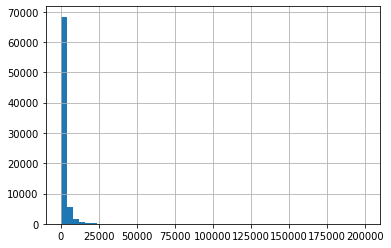

In [7]:
dados.Renda.hist(bins = 50)

A primeira vista pelo histograma, de fato não temos uma curva normal, mas agora iremos checar pelo teste em si.

In [8]:
stats_test, pvalor = normaltest(dados.Renda)

In [9]:
stats_test, pvalor

(152380.75803960307, 0.0)

Para definir se uma distribuição normal tem que ver a partir do pvalor, que pela explicação, é baseada em um H0 que é proveniente de uma distribuição normal, mas como pvalor é menor que a significância (no caso sendo 0.05), H0 é rejeitado com a possibilidade de ser normal.

In [10]:
pvalor <= significancia

True

<AxesSubplot:>

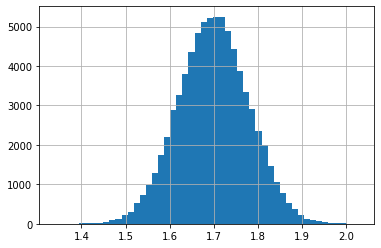

In [11]:
#Testando agora com a variável altura.
dados.Altura.hist(bins = 50)

In [12]:
stats_test, pvalor = normaltest(dados.Altura)
stats_test, pvalor

(0.19973093957002253, 0.9049591541967501)

In [13]:
pvalor <= significancia

False

No caso da altura, esse resultado é falso, ou seja, H0 é um provável proveniente de uma distribuição normal.

# Aula2 : Teste bicaudal e entendendo o valor p.

## Testes Paramétricos
Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **Testes paramétricos**.

### Teste Bicaudal
O teste bicaudal é muito utilizado em testes de qualidade. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafuses, chaves e fechaduras).

A forma de distribuição de um teste bicaudal é a seguinte forma:
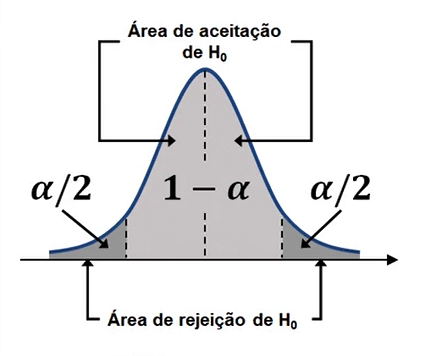

Nela, temos alfa sobre dois do lado direito, esquerdo e 1 menos alfa no centro, que é justamente a área de aceitação de H0. As caudas são as áreas de rejeição de H0. 

In [14]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [15]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra.head()

,Amostra
0,509
1,505
2,495
3,510
4,496


In [16]:
#Pegando a média da amostra:
media_amostra = amostra.mean()[0]
media_amostra


503.24

O 503.24 é um dado problema. Outra coisa que não foi passada no problema é o desvio padrão da população. Tendo a amostra, nós calculamos o seu desvio padrão.


In [17]:
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra

4.48380305052735

In [18]:
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 50

O primeiro passo é a formulação das hipóteses H0 e H1, que são, respectivamente, hipótese nula e hipótese alternativa. É importante lembrar sempre que a igualdade deve estar na hipótese nula, que é o nosso caso. O nosso problema fala qual é a hipótese, ele está testando se mi, que é a média, é igual a 500 contra a hipótese alternativa contrária, de que mi é diferente de 500.

Nesse tipo de teste, estamos testando a igualdade e não importa se ele vai ser menor ou maior que a média. O que nos importa, de fato, é a igualdade, por isso estamos usando o teste bicaudal. Haverá sempre algum problema: se for para cima, é problemático; se for para baixo, também é. O segundo passo é, tendo as hipóteses já formuladas, precisamos escolher a distribuição que utilizaremos para comparar o valor crítico. 

Para pensar essas questões, temos um esquema que já havíamos estudado no vídeo anterior. Nele são apresentadas algumas perguntas que vamos respondendo e chegando até a distribuição que desejamos utilizar.

| n é igual ou maior a 30? | Próxima pergunta: |  Caso sim | Caso não |
| -------------------------| -------------------------| -------------------------| -------------------------|
|Para reposta "sim" |	O desvio padrão (sigma) é conhecido?	| Se sim, então a média é mais ou menos igual a z vezes s sobre raiz de n	| Se não, então a média é mais ou menos igual a z vezes o desvio padrão sobre raiz de n |
| Para resposta "não" |	É possível afirmar que a população se distribui como uma normal?	| Se sim, o desvio padrão é conhecido? Sim: a média é mais ou menos z vezes o desvio padrão sobre raiz de n; Não: média é mais ou menos t vezes s sobre raiz de n	|Se não, aumente o tamanho da amostra ou utilize testes não-paramétricos|

Eu não disse antes, mas as fórmulas que aparecem no final são para cálculo dos intervalos de confiança. Então, é possível aplicar esse tipo de teste no curso anterior que fizemos sobre intervalo de confiança. Se tivermos uma situação que chegue até as fórmulas, utilizaremos outro tipo de distribuição que nós conheceremos no próximo vídeo.

Mas, pensando no nosso caso, n é maior que 30? Sim, pois n é igual a 50. A próxima pergunta é: sigma é conhecido? Ele não falou sobre isso no problema, não falou qual é o desvio padrão da população, o sigma, então, a resposta é não, não é conhecido. Chegamos ao ponto onde temos que usar o z, que é a normal padrão e nós já aprendemos a calcular as probabilidades.

E o s, que é o desvio padrão da amostra, que também já calculamos mais acima com o nome de desvio_padrao_amostra. Com esse passo concluído, já sabemos o que precisamos fazer: a fixação da significância do teste alfa que, no caso, é 5%. Vamos calcular para obter, justamente, um valor que já conhecemos dos cursos anteriores, o 1,96. Precisamos do z para comparar com o valor crítico. 

In [19]:
from scipy.stats import norm

In [20]:
probabilidade = (0.5 + confianca/2)
probabilidade

0.975

In [21]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

In [22]:
z = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
z

5.109559775991873

Sendo Z = 5.11 implica em dizer que está na área de rejeição de H0.

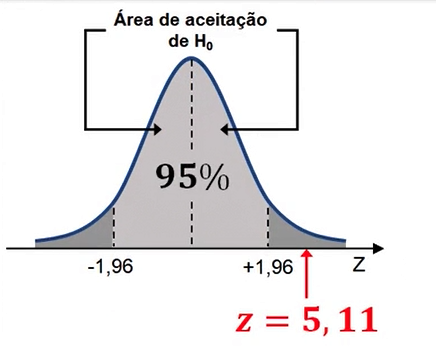

In [23]:
#Critério de Valor crítico:
z <= -(z_alpha_2)

False

In [24]:
z >= (z_alpha_2)

True

Caso seja verdadeiro em um dos dois, H0 será rejeitado.

Conclusão: Como a média amostral x barra é significamente maior que 500ml, rejeitamos H0. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.

In [25]:
# Exercício:

n_ex1 = 30
media_ex1 = 500
media_amostra_ex1 = 485
desvio_padrao_amostra_ex1= 20

z_alpha_2_ex1 = norm.ppf(0.5+confianca/2)  
z_ex1 = (media_amostra_ex1 - media_ex1) / (desvio_padrao_amostra_ex1/np.sqrt(n_ex1))
print("{:.4f}".format(z_ex1))

criterio1 = z_ex1 >= z_alpha_2_ex1
criterio2 = z_ex1 <= -(z_alpha_2_ex1)
if criterio1 == True or criterio2 == True:
    print("Rejeitado")
    
p_valor_ex1 = 2 * (norm.sf(abs(z_ex1)))
print(p_valor_ex1)

-4.1079
Rejeitado
3.992397476901338e-05


Critério de rejeição para o p valor:

O que é o P valor? Lembra que a gente calculou a estatística de teste? Ela chegou e caiu em 5,11, ok? O P valor é justamente a probabilidade, a área calculada do ponto z = 5,11. O risco pontilhado (+1,96) é o nível de significância, alfa sobre dois.

A partir deste pontilhado, nós temos uma área (a cauda direita), uma probabilidade. O P valor é justamente a probabilidade do valor crítico, à frente, à direita, nesta área. O que está querendo dizer aquele teste? Que a área do ponto crítico for menor que a de significância, quer dizer que minha estatística está dentro da região de rejeição. Ou seja, quando o P valor é menor do que Alfa, eu rejeito H0. Perfeito?

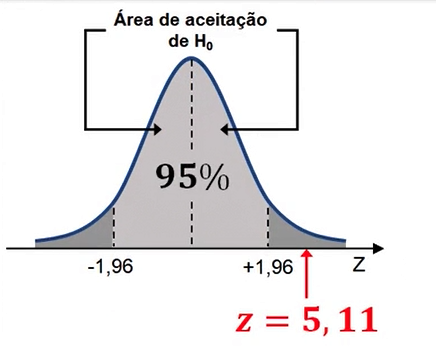

In [26]:
p_valor = 2 * (1 - norm.cdf(z))
p_valor

#outra forma de fazer
#p_valor = 2 * (norm.sf(z))

3.2291031715203644e-07

In [27]:
p_valor <= significancia

True

Sendo p valor menor que a significância, pelo critério de p valor, o H0 é rejeitado.

In [28]:
#Uma forma que o cálculo é feito direto:
from statsmodels.stats.weightstats import ztest

Documentação do statsmodels: [Aqui](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html)

In [29]:
ztest(x1 = amostra, value = media)


(array([5.10955978]), array([3.22910317e-07]))

Outra documentação de função que pode ser usada: [Aqui](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html)

In [30]:
from statsmodels.stats.weightstats import DescrStatsW

In [31]:
test = DescrStatsW(amostra)

In [32]:
z, p_valor = test.ztest_mean(value = media)
print(z, p_valor)

[5.10955978] [3.22910317e-07]


# Aula3: Distribuição t e teste unicaudal.

Já aprendemos a fazer um teste Z bicaudal. Agora vamos começar a trabalhar para fazer um teste T, só que unicaudal.

Unicaudal superior e unicaudal inferior. Eu vou fazer um deles e, no exercício, vamos treinar os outros. A ideia é a mesma, só muda o local na cauda da distribuição. Ok?

Vamos ler o problema primeiro, como sempre fazemos. "Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, no máximo, 37 gramas de açúcar."

Eu li "no máximo", então, não passa. "Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser igual ou menor que 37 gramas". Foi o que ele falou, no máximo 37.

"Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatoriamente, em um conjunto de estabelecimentos distintos."

Ele passeou pela cidade dele, foi em vários estabelecimentos. Comprou 25 latinhas, fez uma amostra de 25, desse refrigerante em questão. 

In [33]:
#Dados do problema
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra

,Amostra
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49
5,36.53
6,35.49
7,36.90
8,34.52
9,37.30


Macete para construir a tabela t de Student:
Com a documentação [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html).

In [34]:
#import pandas as pd
from scipy.stats import t as t_student

tabela_t_student = pd.DataFrame(
    [],
    index = [i for i in range(1,31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for colum in tabela_t_student.columns:
        tabela_t_student.loc[index, colum] = t_student.ppf(1 -float(colum) / 2, index)

index = [('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i/ 100), "{0:0.3f}".format(i/ 100 / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis=1, inplace = True)

tabela_t_student

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 1   6.313752  7.026366  7.915815  9.057887   
                           2   2.919986  3.103977  3.319764  3.578247   
                           3   2.353363  2.470807  2.605427  2.762599   
                           4   2.131847    2.2261  2.332873  2.455892   
                           5   2.015048  2.097837  2.190958  2.297392   
                           6    1.94318  2.019201  2.104306  2.201059   
                           7   1.894579  1.966153  2.046011  2.136453   
                           8   1.859548  1.927986  2.004152  2.090166   
                           9   1.833113  1.899222  1.972653  2.055395   
                           10  1.812461  1.876774  1.948099  2.028327   
                           11  1.795885  1.858772  1.928427  2.006663   
                           12  1.782288  1.844015  1.912313  1.988934   
                           13  1.770933    1.8317  1.898874  1.974158   
                           14   1.76131  1.821267  1.887496  1.961656   
                           15   1.75305  1.812316  1.877739   1.95094   
                           16  1.745884  1.804553  1.869279  1.941654   
                           17  1.739607  1.797755  1.861875   1.93353   
                           18  1.734064  1.791754   1.85534  1.926362   
                           19  1.729133  1.786417   1.84953  1.919992   
                           20  1.724718   1.78164  1.844331  1.914292   
                           21  1.720743  1.777339  1.839651  1.909164   
                           22  1.717144  1.773447  1.835417  1.904524   
                           23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   
                           26  1.705618  1.760983  1.821863  1.889682   
                           27  1.703288  1.758466  1.819126  1.886686   
                           28  1.701131  1.756134  1.816592  1.883912   
                           29  1.699127  1.753968  1.814238  1.881336   
                           30  1.697261  1.751952  1.812047  1.878938   

Bicaudal                           0.060      0.050      0.040      0.030  \
Unicaudal                          0.030      0.025      0.020      0.015   
Graus de Liberdade (n - 1) 1   10.578895  12.706205  15.894545  21.204949   
                           2    3.896425   4.302653   4.848732   5.642778   
                           3     2.95051   3.182446   3.481909   3.896046   
                           4    2.600762   2.776445   2.998528    3.29763   
                           5    2.421585   2.570582   2.756509   3.002875   
                           6    2.313263   2.446912   2.612242   2.828928   
                           7    2.240879   2.364624   2.516752   2.714573   
                           8    2.189155   2.306004   2.448985   2.633814   
                           9    2.150375   2.262157   2.398441   2.573804   
                           10   2.120234   2.228139   2.359315   2.527484   
                           11   2.096139   2.200985    2.32814   2.490664   
                           12   2.076441   2.178813   2.302722     2.4607   
                           13   2.060038   2.160369   2.281604   2.435845   
                           14   2.046169   2.144787   2.263781   2.414898   
                           15   2.034289    2.13145    2.24854   2.397005   
                           16      2.024   2.119905   2.235358   2.381545   
                           17   2.015002   2.109816   2.223845   2.368055   
                           18   2.007067   2.100922   2.213703    2.35618   
                           19   2.000017   2.093024   2.204701   2.345648   
                           20   1.993713   2.0

Tabela usada provavelmente para acesso rápido de valores para casos de teste bicaudal e unicaudal.

Essa distribuição é bem próxima da normal, ela parece muito com a normal. Aquela curva em sino, ela também é simétrica, só tem as caudas um pouco mais largas.

E ela depende, basicamente, dos graus de liberdade da distribuição que a gente está estudando. Que é o que? N, que é o número de registros dentro da nossa amostra, é o número de observações, menos um. Está aqui: Graus de liberdade (n-1) e, em seguida, as colunas.
Eu fiz até o 30. A gente está estudando até o 30, mas você pode fazer mais. Quanto maior o grau de liberdade, mais essa distribuição se aproxima de uma normal. E a gente não precisa usar T de Student, a gente usa a normal. Então até 30 a gente usa a T. Por isso que eu criei T.

Mas como é que eu vou visualizar isso? Aqui embaixo tem uma figura, com uma área hachurada em cinza que é o Alfa, a probabilidade.

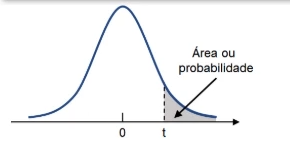

Eu quero descobrir, dada uma probabilidade - o Alfa, a significância, vamos dizer assim - qual é o valor de t, que divide a distribuição em duas partes: o Alfa e o 1 menos Alfa. Se ela for bicaudal, na cauda do lado direito teremos o t e do lado esquerdo -t, porque ela é simétrica como a normal e tem o zero no meio.

Os testes unicaudais verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.
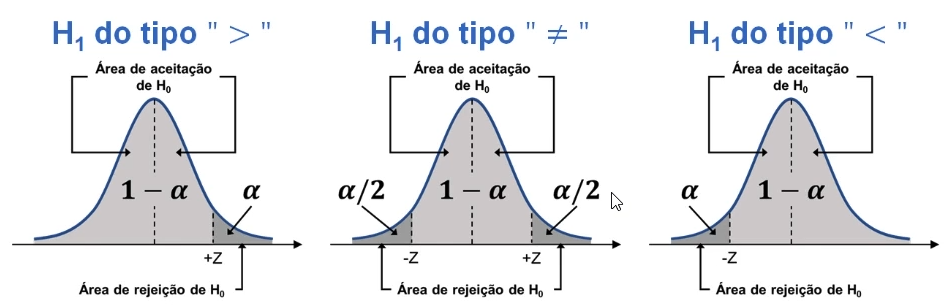

In [35]:
# Agora voltando ao problema.
media_amostra = amostra.mean()[0]
media_amostra

36.2504

In [36]:
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra

0.9667535018469455

In [37]:
media = 37
significancia = 0.05 
confianca = 1 - significancia 
n = 25
graus_de_liberdades = n - 1

In [38]:
#pegando só a parte da tabela t de student que nos interessa.
tabela_t_student[22:25]

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   

Bicaudal                          0.060     0.050     0.040     0.030  \
Unicaudal                         0.030     0.025     0.020     0.015   
Graus de Liberdade (n - 1) 23  1.978249  2.068658  2.176958  2.313231   
                           24  1.973994  2.063899  2.171545  2.306913   
                           25  1.970095  2.059539  2.166587   2.30113   

Bicaudal                          0.020     0.010  
Unicaudal                         0.010     0.005  
Graus de Liberdade (n - 1) 23  2.499867  2.807336  
                           24  2.492159   2.79694  
                           25  2.485107  2.787436

Queremos o caso unicaudal, com 5% de significância e com 24 graus de liberdade. Que nos faz chegar no valor de 1.710882.

In [39]:
#Outra forma de fazer isso é pelo cálculo com a função
t_alpha = t_student.ppf(confianca, graus_de_liberdades)
t_alpha

1.7108820799094275

In [40]:
#Calculando t pela expressão que normalmente usamos:
t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
t

-3.876893119952081

Temos o t_alpha e o t, agora iremos fazer os critérios para ver se H0 é rejeitado ou não. Como é somente o teste unicaudal superior, só precisamos ver o caso se t é maior ou igual ao t$_\alpha$

In [41]:
t >= t_alpha

False

In [42]:
#Tratamento de esgoto, outro exercício:

media_amostra_ex2 = 230
desvio_padrao_amostra_ex2 = 90
media_ex2 = 150
significancia_ex2 = 0.05
confianca_ex2 = 1 - significancia_ex2
n_ex2 = 20
graus_de_liberdade_ex2 = n - 1

t_alpha_ex2 = t_student.ppf(confianca_ex2, graus_de_liberdade_ex2)

t_ex2 = (media_amostra_ex2 - media_ex2) / (desvio_padrao_amostra_ex2 / np.sqrt(n_ex2))

print('t(alpha) =', round(t_alpha_ex2, 4))
print('t =', round(t_ex2, 4))
if(t_ex2 >= t_alpha_ex2):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

t(alpha) = 1.7109
t = 3.9752
Rejeitar H0


Aplicando o p valor:

In [43]:
#Rejeita H0 se p <= alpha
t


-3.876893119952081

In [44]:
p_valor = t_student.sf(t, df = 24)
p_valor

0.9996406170303819

In [45]:
p_valor <= significancia

False

Logo ele não é rejeitado pelo critério de p valor.

In [46]:
test = DescrStatsW(amostra)

In [47]:
t, p_valor, df = test.ttest_mean(value = media, alternative = 'larger')
print(t[0],"\n", p_valor[0],"\n", df)

-3.87689311995208 
 0.9996406170303819 
 24.0


In [48]:
#Exercício

media_amostra_ex3 = 330
desvio_padrao_amostra_ex3 = 80
media_ex3 = 350
significancia_ex3 = 0.05
confianca_ex3 = 1 - significancia_ex3
n_ex3 = 35

z_alpha_ex3 = norm.ppf(confianca_ex3)

z_ex3 = (media_amostra_ex3 - media_ex3) / (desvio_padrao_amostra_ex3 / np.sqrt(n_ex3))

print('z(alpha) =', round(z_alpha_ex3, 3))
print('z =', round(z_ex3, 3))
if(z_ex3 <= -z_alpha_ex3):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

z(alpha) = 1.645
z = -1.479
Aceitar H0


# Aula4: Teste para duas amostras.
Problema mostrado em aula sobre os dados que usamos no começo, e trabalhando em cima de duas amostras de sexos diferentes.

In [49]:
homens = dados.query("Sexo == 0").sample(n = 500, random_state= 101).Renda

In [50]:
mulheres = dados.query("Sexo == 1").sample(n = 500, random_state= 101).Renda

Dados do problema:

In [51]:
media_amostra_M = mulheres.mean()
media_amostra_M

1357.528

In [52]:
desvio_padrao_amostra_M = mulheres.std()
desvio_padrao_amostra_M

1569.901190748458

In [53]:
media_amostra_H = homens.mean()
media_amostra_H

2142.608

In [54]:
desvio_padrao_amostra_H = homens.std()
desvio_padrao_amostra_H

2548.0508024998717

In [55]:
significancia = 0.01
confianca = 1 - significancia
n_H = 500
n_M = 500
D_0 = 0  # Considerando que a diferença entre os dois é nula.

N é maior que 30, é 500, e não sabemos $\sigma$ então com o z e o desvio padrão amostral s.

In [56]:
probabilidade  = confianca
probabilidade

0.99

In [57]:
z_alpha = norm.ppf(probabilidade)
z_alpha

2.3263478740408408

In [58]:
#Calculando manualmente o valor de z
numerador = media_amostra_H - media_amostra_M - D_0
denominador = np.sqrt((desvio_padrao_amostra_H**2)/(n_H) + (desvio_padrao_amostra_M**2)/(n_M))
z = numerador / denominador
z

5.8656200577647555

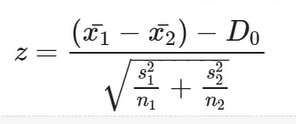

In [59]:
z >= z_alpha

True

Rejeitamos pois o critério de rejeição é satisfeito, z é maior que z$_\alpha$.

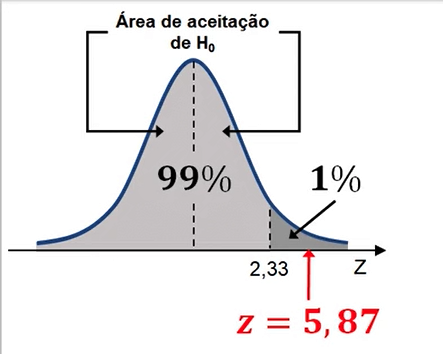


A conclusão é: "Com um nível de confiança de 99% rejeitamos H0. Isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino." 

In [60]:
#exercício 3: Shampoos
from scipy.stats import t as t_student


shampoo_Novo = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
shampoo_Antigo = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])

media_A = shampoo_Novo.mean()
desvio_padrao_A = shampoo_Novo.std()

media_B = shampoo_Antigo.mean()
desvio_padrao_B = shampoo_Antigo.std()

significancia = 0.05
confianca = 1 - significancia
n_A = len(shampoo_Novo)
n_B = len(shampoo_Antigo)
D_0 = 2

graus_de_liberdade = n_A + n_B - 2

t_alpha = t_student.ppf(confianca, graus_de_liberdade)

numerador = (media_A - media_B) - D_0
denominador = np.sqrt((desvio_padrao_A ** 2 / n_A) + (desvio_padrao_B ** 2 / n_B))
t = numerador / denominador

print('t =', round(t, 4))

if(t >= t_alpha):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

t = 2.6646
Rejeitar H0


### Critério do valor p

Documentação de uma nova função que será usada: [aqui](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.CompareMeans.ttest_ind.html)


Queremos fazer o critério baseado em  Rejeitar $H_0$ se valor $ p < \alpha $.

In [61]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
test_H = DescrStatsW(homens)
test_M = DescrStatsW(mulheres)

In [62]:
test_A = test_H.get_compare(test_M)

In [63]:
test_A.ztest_ind(alternative='larger', value=0)

(5.865620057764754, 2.2372867859458255e-09)

In [64]:
z, p_valor = test_A.ztest_ind(alternative='larger', value=0)

In [65]:
p_valor

2.2372867859458255e-09

In [66]:
p_valor <= significancia

True

Ou seja, temos que rejeitar o $H_0$ pelo critério do valor p.

In [67]:
#Outra forma:
test_B = CompareMeans(test_H, test_M)

z, p_valor = test_B.ztest_ind(alternative='larger', value=0)
p_valor

2.2372867859458255e-09

In [68]:
p_valor <= significancia

True

# Aula 5: Distribuição Qui-Quadrado

Agora partiremos para teste não-paramétricos.

Teste de adequação ao ajustamento.
O teste do $\chi^2$ teste a hipótese nula de não haver diferença entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para esse evento.

Os passos de aplicação desse teste são bem parecidos com os teste paramétricos.

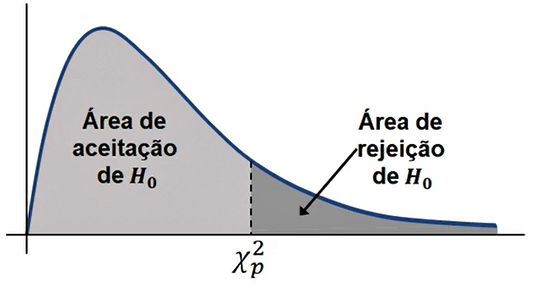



Considere a ação de jogar uma moeda para o alto 50 vezes, a tabela a seguir mostra o que era esperado e o que aconteceu em relação a quantas vezes caiu cada um dos lados.


|      | Cara | Coroa |
| ----------- | ----------- | ----------- |
|Observado | 30 | 20 |
|Esperado  | 25 | 25 | 

In [69]:
#Construindo a tabela de CHI**2

import pandas as pd
from scipy.stats import chi

tabela_t_chi_2 = pd.DataFrame(
    [], 
    index=[i for i in range(1, 31)],
    columns = [0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975, 0.95, 0.99, 0.995]
)

for index in tabela_t_chi_2.index:
    for column in tabela_t_chi_2.columns:
        tabela_t_chi_2.loc[index, column] = "{0:0.4f}".format(chi.ppf(float(column), index)**2)

tabela_t_chi_2.index.name='Graus de Liberdade'
tabela_t_chi_2.rename_axis(['p'], axis=1, inplace = True)

tabela_t_chi_2

p,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
Graus de Liberdade,,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382
4,0.2070,0.2971,0.4844,0.7107,1.0636,1.9226,3.3567,5.3853,7.7794,11.1433,9.4877,13.2767,14.8603
5,0.4117,0.5543,0.8312,1.1455,1.6103,2.6746,4.3515,6.6257,9.2364,12.8325,11.0705,15.0863,16.7496
6,0.6757,0.8721,1.2373,1.6354,2.2041,3.4546,5.3481,7.8408,10.6446,14.4494,12.5916,16.8119,18.5476
7,0.9893,1.2390,1.6899,2.1673,2.8331,4.2549,6.3458,9.0371,12.0170,16.0128,14.0671,18.4753,20.2777
8,1.3444,1.6465,2.1797,2.7326,3.4895,5.0706,7.3441,10.2189,13.3616,17.5345,15.5073,20.0902,21.9550
9,1.7349,2.0879,2.7004,3.3251,4.1682,5.8988,8.3428,11.3888,14.6837,19.0228,16.9190,21.6660,23.5894


Onde o p da tabela está associado com a área de aceitação do gráfico de $\chi^2$, o $1-p$ está associado com a área de rejeição, a parte mais acinzentada do gráfico.

In [70]:
#Dados do problema:
# Ordem, cara coroa.
F_Observada = [17, 33]
F_Esperada = [25, 25]
significancia = 0.05
confianca = 1 - significancia
k = 2 # Número de eventos possíveis
graus_de_liberdade = k - 1

In [71]:
from scipy.stats import chi

In [72]:
tabela_t_chi_2[:3]

p,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
Graus de Liberdade,,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382


Estamos com a situação de dois eventos possíveis, que dariam um total de 1 grau de liberdade.

Além disso, como temos a significância de 5%, significa que a confiança é de 95%.

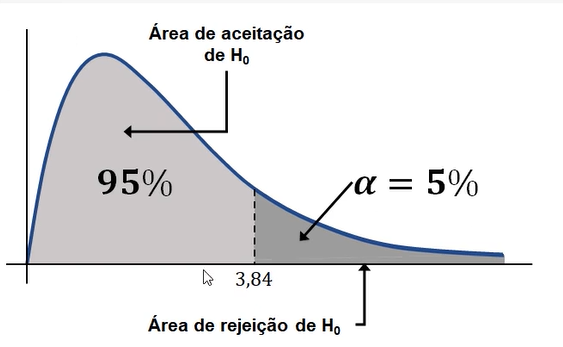

Ou seja, basta ir na linha de um grau de liberdade e na coluna da confiança de 0.950: 3.8415

In [73]:
#Outra forma de chegar no mesmo valor.
chi_2_alpha = chi.ppf(confianca, graus_de_liberdade) ** 2
chi_2_alpha

3.8414588206941245

Cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeiçãodo teste:
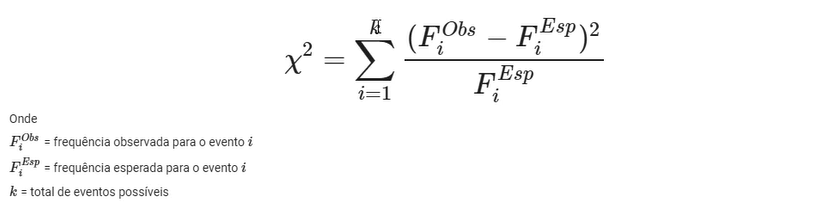

In [74]:
chi_2 = ((F_Observada[0] - F_Esperada[0])**2/(F_Esperada[0])) + ((F_Observada[1] - F_Esperada[1])**2/(F_Esperada[1]))
chi_2

5.12

In [75]:
chi_2 = 0
for i in range(k):
    chi_2 += (F_Observada[i] - F_Esperada[i]) ** 2 /  F_Esperada[i]

chi_2


5.12

Então sabemos agora onde se posiciona o $\chi^2$ se posiciona nesse caso e vemos em que área ele se encontra: de rejeição.

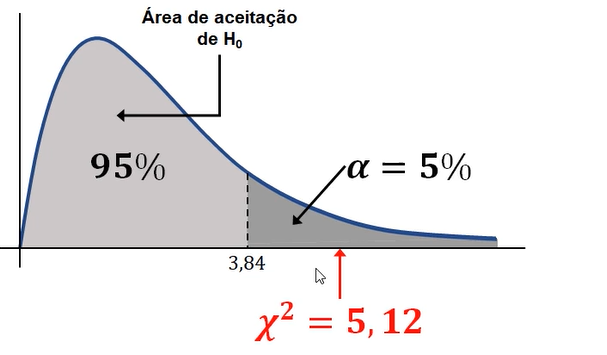

Como foi falado, o critério de rejeição se baseia se $\chi^2 > \chi^2_\alpha$.
Como de fato é, $H_0$ é rejeitado.

In [76]:
chi_2 > chi_2_alpha

True

"Com um nível de confiança de 95% rejeitamos a hipótese nula e concluímos que as frequências observadas e esperadas são discrepantes", são diferentes. "Ou seja, a moeda não é honesta e precisa ser substituída", senão vai atrapalhar o jogo todo.

### Critério do valor p
É um pouco diferente, contudo podemos chegar de forma parecida.

In [77]:
chi_2

5.12

In [78]:
raiz_chi_2 = np.sqrt(chi_2)
raiz_chi_2

2.262741699796952

In [79]:
p_valor = chi.sf(raiz_chi_2, df = 1)
p_valor

0.023651616655356

In [80]:
p_valor <= significancia

True

$H_0$ também é rejeitado pelo critério do valor p.

In [81]:
#Forma mais simples de fazer tudo isso
from scipy.stats import chisquare

In [82]:
chi_2, p_valor = chisquare(f_obs=F_Observada, f_exp=F_Esperada)
print(chi_2)
print(p_valor)


5.12
0.023651616655356


In [83]:
p_valor <= significancia

True

In [84]:
#exercicio 4
chi_2 = 7.45
raiz_chi_2 = np.sqrt(chi_2) 
p_valor = chi.sf(raiz_chi_2, df = 5)
print('p-valor =', p_valor.round(4))

p-valor = 0.1893


# Aula 6: Teste de Wilcoxon e Mann-Witney

Mais um teste não paramétrico, Teste de Wilcoxon é um teste de comparação entre populações, mas quando as amostras são dependentes, são relacionadas. Isso pode ser aplicado quando se deseja testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas.

**Um problema:**

Um novo tratamento para acabar com o hábito de fumar está sendo empregado em um grupo de 35 pacientes voluntários.
De cada paciente testado foram obtidas as informações de quantidade de cigarros consumidos antes e depois do termino do tratamento.
Assumindo um nível de confiança de 95% é possível concluir que depois da aplicação do tratamento houve uma mudança no hábito de fumar no grupo de pacientes testados?


In [85]:
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]
}
significancia = 0.05
confianca = 1 - significancia
n = 35

In [86]:
fumo = pd.DataFrame(fumo)
fumo.head()

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


In [87]:
media_antes = fumo.Antes.mean()
media_antes

31.857142857142858

In [88]:
media_antes = fumo.Antes.mean()
media_antes


31.857142857142858

In [89]:
media_depois = fumo.Depois.mean()
media_depois

11.2

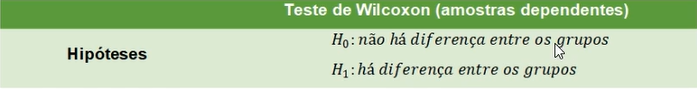
Na hipótese $H_0$ as médias de antes e depois são iguais, e no $H_1$ as médias são diferentes, mais especificamente $\mu_{antes} > \mu_{depois}$.

In [90]:
# Achando a probabilidade e o z alpha/2
probabilidade = 0.5 + confianca/2
probabilidade

0.975

In [91]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

Cálculo para achar o Z:
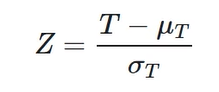


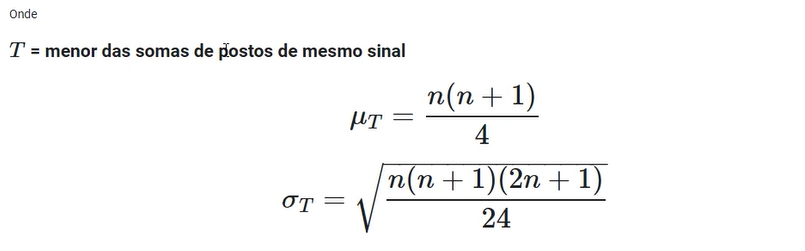

In [92]:
fumo.head()

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


In [93]:
fumo["Dif"] = fumo.Antes - fumo.Depois
fumo.head()

,Antes,Depois,Dif
0,39,16,23
1,25,8,17
2,24,12,12
3,50,0,50
4,13,14,-1


In [94]:
fumo["|Dif|"] = fumo.Dif.abs()
fumo.head()

,Antes,Depois,Dif,|Dif|
0,39,16,23,23
1,25,8,17,17
2,24,12,12,12
3,50,0,50,50
4,13,14,-1,1


In [95]:
fumo.sort_values(by = "|Dif|", inplace = True)
fumo

,Antes,Depois,Dif,|Dif|
4,13,14,-1,1
20,17,16,1,1
31,17,19,-2,2
21,12,16,-4,4
24,14,18,-4,4
9,22,17,5,5
6,21,13,8,8
29,23,14,9,9
8,10,19,-9,9
17,15,4,11,11


In [96]:
fumo["Posto"] = range(1, len(fumo) + 1)
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto
4,13,14,-1,1,1
20,17,16,1,1,2
31,17,19,-2,2,3
21,12,16,-4,4,4
24,14,18,-4,4,5


In [97]:
posto = fumo[['|Dif|', 'Posto']].groupby(['|Dif|']).mean()
posto

,Posto
|Dif|,
1,1.5
2,3.0
4,4.5
5,6.0
8,7.0
9,8.5
11,10.0
12,11.5
13,13.0


In [98]:
posto.reset_index(inplace = True)
posto

,|Dif|,Posto
0,1,1.5
1,2,3.0
2,4,4.5
3,5,6.0
4,8,7.0
5,9,8.5
6,11,10.0
7,12,11.5
8,13,13.0
9,17,15.0


In [99]:
fumo.drop(["Posto"], axis = 1, inplace = True)
fumo.head()

,Antes,Depois,Dif,|Dif|
4,13,14,-1,1
20,17,16,1,1
31,17,19,-2,2
21,12,16,-4,4
24,14,18,-4,4


In [100]:
fumo = fumo.merge(posto, left_on='|Dif|', right_on='|Dif|', how = 'left')
fumo

,Antes,Depois,Dif,|Dif|,Posto
0,13,14,-1,1,1.5
1,17,16,1,1,1.5
2,17,19,-2,2,3.0
3,12,16,-4,4,4.5
4,14,18,-4,4,4.5
5,22,17,5,5,6.0
6,21,13,8,8,7.0
7,23,14,9,9,8.5
8,10,19,-9,9,8.5
9,15,4,11,11,10.0


In [101]:
fumo['Posto (+)'] = fumo.apply(lambda x: x.Posto if x.Dif > 0 else 0, axis = 1)
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto,Posto (+)
0,13,14,-1,1,1.5,0.0
1,17,16,1,1,1.5,1.5
2,17,19,-2,2,3.0,0.0
3,12,16,-4,4,4.5,0.0
4,14,18,-4,4,4.5,0.0


In [102]:
fumo['Posto (-)'] = fumo.apply(lambda x: x.Posto if x.Dif < 0 else 0, axis = 1)
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto,Posto (+),Posto (-)
0,13,14,-1,1,1.5,0.0,1.5
1,17,16,1,1,1.5,1.5,0.0
2,17,19,-2,2,3.0,0.0,3.0
3,12,16,-4,4,4.5,0.0,4.5
4,14,18,-4,4,4.5,0.0,4.5


In [103]:
fumo.drop(["Posto"], axis = 1, inplace = True)
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto (+),Posto (-)
0,13,14,-1,1,0.0,1.5
1,17,16,1,1,1.5,0.0
2,17,19,-2,2,0.0,3.0
3,12,16,-4,4,0.0,4.5
4,14,18,-4,4,0.0,4.5


**T** é igual a menos das somas dos postos de mesmo sinal.

In [104]:
T = min(fumo["Posto (+)"].sum(), fumo["Posto (-)"].sum())
T

22.0

Obtendo $\mu_T$

In [105]:
mu_t = (n*(n+1))/4
mu_t

315.0

Obtendo finalmente $\sigma_T$

In [106]:
sigma_T = np.sqrt((n * (n + 1) * ((2 * n) + 1)) / 24)
sigma_T


61.053255441458646

In [107]:
Z = (T - mu_t)/sigma_T
Z

-4.799088891843698

Isso tudo é a forma manual de resolver o problema. Depois será ensinado um método mais prático.
Agora veremos se a hipótese é válida pelos critério de Z, caso seja verdadeiro em algum caso, ele será rejeitado.


In [108]:
print(Z <= -z_alpha_2)

print(Z >= z_alpha_2)

True
False


Sendo verdadeiro, ele é rejeitado. "Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, existe uma diferença entre as médias de cigarros fumados pelos pacientes antes e depois do tratamento."

"E como é possível verificar através das médias de cigarros fumados por dia antes, 31.86, e depois,11.2, do tratamento, podemos concluir que o tratamento apresentou resultado satisfatório."

Aplicando o valor P:

In [109]:
from scipy.stats import wilcoxon

T, p_valor = wilcoxon(fumo.Antes, fumo.Depois)


In [110]:
p_valor <= significancia

True

In [111]:
#Exercício da Alura
#from scipy.stats import wilcoxon

sem_Alura = pd.Series([ 7,  8, 6, 6, 10, 4, 2, 5,  9, 2, 4, 9, 1, 10])
com_Alura = pd.Series([10, 10, 9, 9,  9, 7, 5, 8, 10, 6, 3, 7, 4,  8])

significancia = 0.10

T, p_valor = wilcoxon(sem_Alura, com_Alura)
print('T =', T)

if(p_valor <= significancia):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

T = 14.0
Rejeitar H0


### Teste de Mann-Whitney

Comparação de duas populações  - amostras independentes.

Mann-Whitney é um teste não paramétrico utilizado para verificar se duas amostras independentes doram selecionadas a partir de populaçoes que têm a mesma média. Por ser um teste não paaramétrico, Mann-Whitney torna-se uma alternativa ao teste paramétrico de comparação de médias.

In [112]:
mulheres = dados.query('Sexo == 1 and Renda > 0').sample(n = 8, random_state = 101).Renda

homens = dados.query('Sexo == 0 and Renda > 0').sample(n = 6, random_state = 101).Renda

In [113]:
media_amostra_M = mulheres.mean()
media_amostra_M

1090.75

In [114]:
media_amostra_H = homens.mean()
media_amostra_H

1341.6666666666667

In [115]:
significancia = 0.05
confianca = 1 - significancia
n_1 = len(homens)
n_2 = len(mulheres)

Hipótese inicial: Que $H_0$ tenha as médias iguais, e que a segunda hipótese seja que a média feminina seja menor que a masculina.

Devemos utilizar a distribuição de t de student pois não temos informação da distribuição, o desvio padrão populacional é desconhecido e que n é menor que 30.

In [116]:
graus_de_liberdade = n_1 + n_2 - 2
graus_de_liberdade

12

In [117]:
tabela_t_student[10:13]

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 11  1.795885  1.858772  1.928427  2.006663   
                           12  1.782288  1.844015  1.912313  1.988934   
                           13  1.770933    1.8317  1.898874  1.974158   

Bicaudal                          0.060     0.050     0.040     0.030  \
Unicaudal                         0.030     0.025     0.020     0.015   
Graus de Liberdade (n - 1) 11  2.096139  2.200985   2.32814  2.490664   
                           12  2.076441  2.178813  2.302722    2.4607   
                           13  2.060038  2.160369  2.281604  2.435845   

Bicaudal                          0.020     0.010  
Unicaudal                         0.010     0.005  
Graus de Liberdade (n - 1) 11  2.718079  3.105807  
                           12  2.680998   3.05454  
                           13  2.650309  3.012276

In [118]:
t_alpha = t_student.ppf(significancia, graus_de_liberdade)
t_alpha.round(2)

-1.78

In [119]:
H = pd.DataFrame(homens)
H["Sexo"] = "Homens"
H

,Renda,Sexo
67872,1200,Homens
30211,2000,Homens
64406,850,Homens
26519,800,Homens
61540,2000,Homens
17422,1200,Homens


In [120]:
M = pd.DataFrame(mulheres)
M["Sexo"] = "Mulheres"
M

,Renda,Sexo
6251,1100,Mulheres
34764,400,Mulheres
40596,788,Mulheres
11303,4300,Mulheres
22733,250,Mulheres
24707,400,Mulheres
60340,700,Mulheres
17035,788,Mulheres


In [121]:
sexo = pd.concat([H,M])
sexo.reset_index(inplace = True, drop = True)
sexo

,Renda,Sexo
0,1200,Homens
1,2000,Homens
2,850,Homens
3,800,Homens
4,2000,Homens
5,1200,Homens
6,1100,Mulheres
7,400,Mulheres
8,788,Mulheres
9,4300,Mulheres


In [122]:
sexo.sort_values(by = "Renda", inplace = True)
sexo

,Renda,Sexo
10,250,Mulheres
7,400,Mulheres
11,400,Mulheres
12,700,Mulheres
8,788,Mulheres
13,788,Mulheres
3,800,Homens
2,850,Homens
6,1100,Mulheres
0,1200,Homens


In [123]:
sexo["Posto"] = range(1, len(sexo) + 1)
sexo

,Renda,Sexo,Posto
10,250,Mulheres,1
7,400,Mulheres,2
11,400,Mulheres,3
12,700,Mulheres,4
8,788,Mulheres,5
13,788,Mulheres,6
3,800,Homens,7
2,850,Homens,8
6,1100,Mulheres,9
0,1200,Homens,10


In [124]:
posto = sexo[["Renda", "Posto"]].groupby(["Renda"]).mean()
posto

,Posto
Renda,
250,1.0
400,2.5
700,4.0
788,5.5
800,7.0
850,8.0
1100,9.0
1200,10.5
2000,12.5


In [125]:
posto.reset_index(inplace = True)
posto

,Renda,Posto
0,250,1.0
1,400,2.5
2,700,4.0
3,788,5.5
4,800,7.0
5,850,8.0
6,1100,9.0
7,1200,10.5
8,2000,12.5
9,4300,14.0


In [126]:
sexo.drop(["Posto"], axis = 1, inplace = True)
sexo

,Renda,Sexo
10,250,Mulheres
7,400,Mulheres
11,400,Mulheres
12,700,Mulheres
8,788,Mulheres
13,788,Mulheres
3,800,Homens
2,850,Homens
6,1100,Mulheres
0,1200,Homens


In [127]:
sexo= sexo.merge(posto, left_on="Renda", right_on="Renda", how = "left")
sexo

,Renda,Sexo,Posto
0,250,Mulheres,1.0
1,400,Mulheres,2.5
2,400,Mulheres,2.5
3,700,Mulheres,4.0
4,788,Mulheres,5.5
5,788,Mulheres,5.5
6,800,Homens,7.0
7,850,Homens,8.0
8,1100,Mulheres,9.0
9,1200,Homens,10.5


In [128]:
#Obtendo R
Temp = sexo[["Sexo", "Posto"]].groupby("Sexo").sum()
Temp

,Posto
Sexo,
Homens,61.0
Mulheres,44.0


In [130]:
R_1 = Temp.loc["Homens"][0]
R_1

61.0

In [131]:
R_2 = Temp.loc["Mulheres"][0]
R_2

44.0

In [132]:
u_1 = n_1*n_2 + (n_1*(n_1+1))/2 - R_1
u_1

8.0

In [133]:
u_2 = n_1*n_2 + (n_2*(n_2+1))/2 - R_2
u_2

40.0

In [134]:
u = min(u_1, u_2)
u

8.0

In [136]:
#Calculando média
mu_u = (n_1*n_2)/2
mu_u

24.0

In [137]:
sigma_u = np.sqrt(n_1 * n_2 * (n_1 + n_2 + 1) / 12)
sigma_u

7.745966692414834

In [140]:
#Obtendo Z
Z = (u - mu_u) / sigma_u
Z.round(2)

-2.07

In [139]:
#Critério para ver se será rejeitado
Z <= t_alpha


True

Então é rejeitado a hipótese de que não há diferença entre grupos.
Isto é, concluímos que a média das rendas dos chefes de domicílios do sexo feminino é menor que a média das rendas dos chefes de domicílios do sexo masculino. Confirmando a alegação de desigualdade de renda entre os sexos.

In [141]:
#Aplicando p valor.
from scipy.stats import mannwhitneyu

mannwhitneyu(mulheres, homens, alternative='less')

MannwhitneyuResult(statistic=8.0, pvalue=0.022221119551528605)

In [142]:
u, p_valor = mannwhitneyu(mulheres, homens, alternative='less')
print(u)
print(p_valor)


p_valor <= significancia


8.0
0.022221119551528605


True

In [143]:
#Exercício
from scipy.stats import mannwhitneyu

sem_Exercicios = pd.Series([7, 6, 7, 8, 6, 8, 6, 9, 5])
com_Exercicios = pd.Series([8, 7, 6, 6, 8, 6, 10, 6, 7, 8])

significancia = 0.10

u, p_valor = mannwhitneyu(com_Exercicios, sem_Exercicios, alternative='greater')

print('u =', u)

if(p_valor <= significancia):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

u = 50.0
Aceitar H0


In [ ]:
## PRojeto final agora